# Plotting Financial Data

Our goal in this Practice is to right customer functions to produce the following plot for any stock.  The plot below is for Apple from 1/1/2017 to 3/1/2017:

<img src="Apple_result.png">

In [6]:
%matplotlib inline

#Put all your import here
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader as web
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc

The first function you will write is Get_Stock_Info.

**Input**:  stock_ticker as a string and start/end dates as datetime objects that are within two months of each other.

**Returns**:  data frame with date (as a matplotlib date), open,high,low,close and volumn from yahoo finace"""

In [7]:
def Get_Stock_Info(stock_ticker, start_date, end_date):
    


    
    #Get the data
    stock_info = web.DataReader(stock_ticker, data_source="yahoo", start=start_date, end = end_date)
    
    #Reset the index so the Date is a column
    stock_info.reset_index(inplace =True)
    
    #Convert the date to a maplotlib date
    stock_info["Date"] = stock_info["Date"].map(mdates.date2num)
    
    #Only pick the columns I want
    final_stock_info = stock_info.loc[:, ["Date", "Open", "High", "Low", "Close", "Volume"]]
    
    return final_stock_info
    
    


The second function will create three plots.

**Input**:  dataframe from a stock with columns date (as a matplotlib date) open,high,low,close and volumn, price at which the given stock was purchased, stock ticker and start/end date.

**Returns**:  Nothing.

However, this function will produce a 3x1 figure with the followig three plot:
    
- top figure : candlestick plot

- middle figure :  line splot of closing price where the plot is shaded red below the buy_price and green above this price.

- bottom figure: volumn as area plot

All axes and plot should have the appropriate labels that should change when you change the stock you are analyzing.  Feel free to play around with fonts, spines and colors of the axis and labels. You shoud make the figsize = (15,18)


In [24]:


def Make_Plots(stock_data, buy_price, stock_ticker, start_date, end_date):
    
    #Set style
    plt.style.use("ggplot")
    
    #Make figure and axes
    fig, (ax0,ax1,ax2) = plt.subplots(nrows=3, ncols=1, figsize = (15,30))
    
    #Make figure title
    fig.suptitle("%s Stock Info from %s to %s" %(stock_ticker, str(start_date.date()), str(end_date.date()) ))
    
    #Set x/y-axis labels and titles
    ax0.set(title = "Candlestick plot for %s" %stock_ticker, xlabel = "Date", ylabel = "Price")
    ax1.set(title = "Closing Price for %s" %stock_ticker, xlabel = "Date", ylabel = "Closing Price")
    ax2.set(title = "Volume for %s" %stock_ticker, xlabel = "Date", ylabel = "Volume")

    
    #Make x-axis dates
    ax0.xaxis_date()
    ax1.xaxis_date()
    ax2.xaxis_date()
    
    #Prepare data for candlestick
    stock_ohlc = stock_data.loc[:,["Date","Open", "High", "Low", "Close"]]
    #Make candlestick plot
    candlestick_ohlc(ax0, np.array(stock_ohlc), colorup = 'g', colordown='r')
    
    #Make line plot for closing price
    stock_ohlc.plot(kind="line", x= "Date", y = "Close", color = "#000000", ax = ax1)
    #Fill between
    ax1.fill_between(x = stock_data.Date, y1 = stock_data.Close,\
                     y2 = buy_price, where = (stock_data.Close > buy_price),  color = 'g', alpha = 0.5, label = "Gain"  )
    ax1.fill_between(x = stock_data.Date, y1 = stock_data.Close,\
                  y2 = buy_price, where =stock_data.Close <= buy_price, color = 'r', alpha = 0.5, label = "Loss"  )
    
    ax1.legend(loc=0)
    
    #Add are plot for volume
    stock_data.plot(ax =ax2,kind = "area", x = "Date", y = "Volume", color = "b", alpha = 0.8)
    
    for label in ax0.get_xticklabels():
        label.set_rotation(45)
        
    for label in ax1.get_xticklabels():
        label.set_rotation(45)
    
    for label in ax2.get_xticklabels():
        label.set_rotation(45)
    
    return fig
    
    
    
    
    
    


In [16]:
#Combine functions here
start_date = dt.datetime(month = 1, day =1, year= 2017)
end_date = dt.datetime(month = 3, day =1, year= 2017)
stock_ticker = "AAPL"


stock_data = Get_Stock_Info(stock_ticker, start_date, end_date)

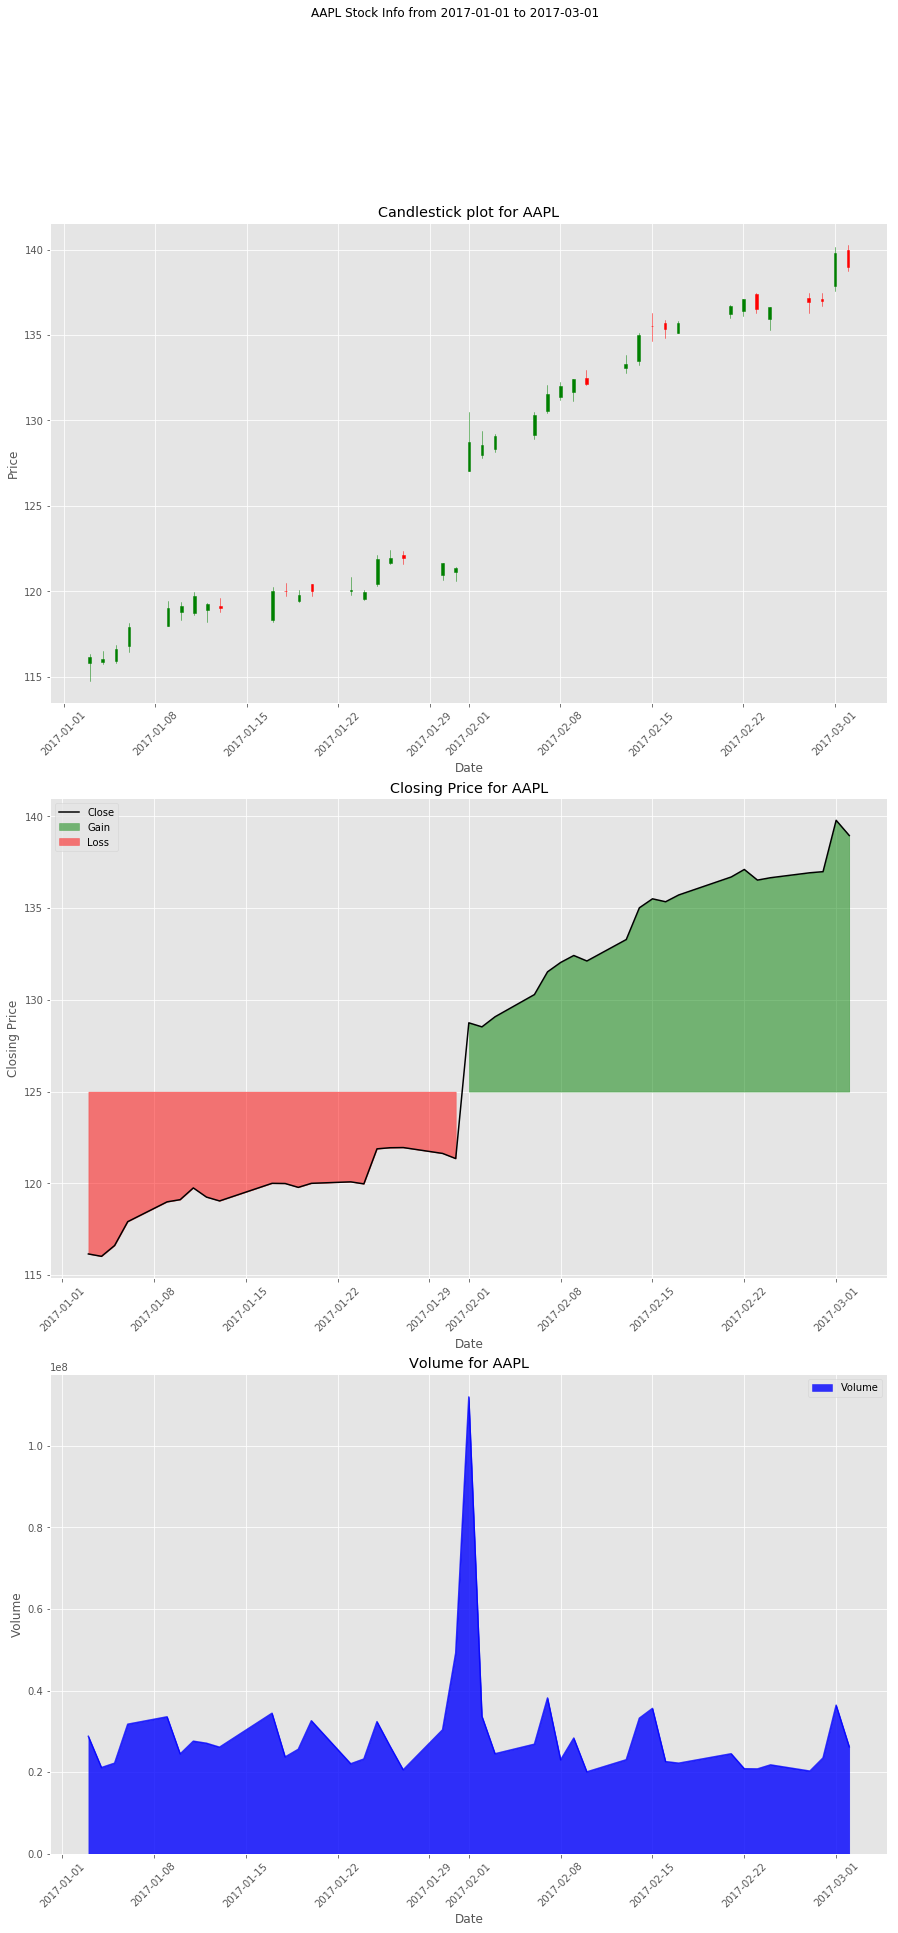

In [25]:

buy_price = 125
fig = Make_Plots(stock_data, buy_price , stock_ticker, start_date, end_date)

In [28]:
fig.savefig("AAPL.png")